In [1]:
!pip install lightgbm

### Library Importation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMRegressor
from pathlib import Path

pd.set_option('display.max_columns', None)

%matplotlib inline
import warnings

### Data Loading and Inspection


In [2]:
train = pd.read_csv(r"C:\Users\HP\onedrive\Documents\Github\Univelcity_Capstone\data\Airqo\Train.csv")
test = pd.read_csv(r"C:\Users\HP\onedrive\Documents\Github\Univelcity_Capstone\data\Airqo\Test.csv")

train.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052301,828817.9375,-100.805145,21.720518,-123.523796,33.745914,0.122055,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.045475,3771.027210,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000214,1.462390,0.000240,0.359150,26.525513,-143.480164,59.220097,70.875954,-0.315206,828578.6250,70.875954,59.220097,-143.480164,26.525513,0.116975,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097816,828878.6875,-96.411942,61.045010,-121.307121,41.898113,0.117559,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7

In [3]:
test.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,id_ihxgrbq8bw,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-06,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,26.926420,-86.879776,25.512329,-0.000028,9.0,0.043537,2825.323242,1.000000,829406.9375,-97.787621,26.897718,-86.884308,25.509418,0.000055,0.000016,0.000040,0.000109,9582.745678,-0.258421,0.019749,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.000243,1.112240,0.000213,0.079645,25.512329,-86.879776,26.926420,-100.330299,-0.258422,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.126056,2.243713,0.286278,230.244171,0.079324,-100.330299,26.926420,-86.879776,25.512329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043065,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,id_dg6s4fhiwe,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-07,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.036341,2604.788330,1584.809692,829328.6250,70.753090,11.428769,-87.764297,20.935318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408162,829340.750000,76.400116,11.171532,-87.726566,20.951560,0.126282,2.136400,0.273757,230.184377,0.613266,76.400116,11.171532,-87.726566,20.951560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_f7hwwtmuzp,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-08,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,43.112466,-89.089083,16.417355,-0.000023,9.0,0.037453,3046.3140

In [4]:
test.shape

(2783, 79)

In [5]:
train.shape

(8071, 80)

In [6]:
# Getting the info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

In [7]:
# Summary statistics of train data
train.describe()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,8071.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000
mean,0.635678,30.246982,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,27.700157,0.000004,6.122414,0.034887,2200.218221,2041.463881,829573.191993,-8.063021,38.482742,-91.507702,28.609344,0.000074,0.000040,0.000033,0.000130,8836.367723,-0.369219,0.081754,829581.679425,-12.334603,37.299477,-93.711870,28.807872,0.000175,1.046935,0.000109,0.192196,28.036877,-92.363482,40.218543,-2.760999,-0.442617,829596.648655,-12.608537,41.387619,-88.902996,28.385504,0.117739,2.650292,0.316414,228.241939,0.516471,-13.304661,41.293259,-88.650645,28.541850,2217.913597,78611.503814,1.880600,

#### Data Cleaning

In [8]:
# Check for missing values
missing_values = train.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(train)) * 100

# Convert to a DataFrame and display as a table
missing_df = missing_values.to_frame(name="Missing Values")
missing_df["Percentage"] = missing_percentage
missing_df.style.format({"Percentage": "{:.2f}%"})


,Missing Values,Percentage
id,0,0.00%
site_id,0,0.00%
site_latitude,0,0.00%
site_longitude,0,0.00%
city,0,0.00%
country,0,0.00%
date,0,0.00%
hour,0,0.00%
sulphurdioxide_so2_column_number_density,4912,60.86%
sulphurdioxide_so2_column_number_density_amf,4912,60.86%


In [9]:
def calculate_missing_mean(df):
    missing_columns = df.columns[df.isnull().any()]
    missing_mean = df[missing_columns].mean()
    return missing_mean

missing_mean = calculate_missing_mean(train)
missing_mean_df = missing_mean.to_frame(name="Mean of Missing Columns")

print(missing_mean_df)

                                                Mean of Missing Columns
sulphurdioxide_so2_column_number_density                       0.000024
sulphurdioxide_so2_column_number_density_amf                   0.687295
sulphurdioxide_so2_slant_column_number_density                 0.000013
sulphurdioxide_cloud_fraction                                  0.126581
sulphurdioxide_sensor_azimuth_angle                            2.120939
...                                                                 ...
cloud_surface_albedo                                           0.255501
cloud_sensor_azimuth_angle                                   -18.952179
cloud_sensor_zenith_angle                                     45.881380
cloud_solar_azimuth_angle                                    -84.811978
cloud_solar_zenith_angle                                      28.708028

[70 rows x 1 columns]


In [10]:
# Set the threshold percentage
threshold_1 = 60 
threshold_2 = 40
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(train)) * 100

# Get the columns to drop
columns_to_drop_1 = missing_percentage[missing_percentage >= threshold_1].index.tolist()
columns_to_drop_2 = missing_percentage[missing_percentage >= threshold_2].index.tolist()


train_all = train.copy()

In [11]:
train_all.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052301,828817.9375,-100.805145,21.720518,-123.523796,33.745914,0.122055,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.045475,3771.027210,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000214,1.462390,0.000240,0.359150,26.525513,-143.480164,59.220097,70.875954,-0.315206,828578.6250,70.875954,59.220097,-143.480164,26.525513,0.116975,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097816,828878.6875,-96.411942,61.045010,-121.307121,41.898113,0.117559,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7

In [12]:
# Drop columns with missing values above 60%
train_1 = train_all.drop(columns_to_drop_1, axis=1)
train_1

,id,site_id,site_latitude,site_longitude,city,country,date,hour,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-10-25,13,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052301,828817.937500,-100.805145,21.720518,-123.523796,33.745914,0.122055,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-02,12,11.0,0.045475,3771.027210,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,0.000214,1.462390,0.000240,0.359150,26.525513,-143.480164,59.220097,70.875954,-0.315206,828578.625000,70.875954,59.220097,-143.480164,26.525513,0.116975,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-03,13,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097816,828878.687500,-96.411942,61.045010,-121.307121,41.898113,0.117559,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,0.756392,45185.499590,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-08,14,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591543,828920.687500,-95.863083,65.508858,-122.218231,43.923038,0.118412,3.505708,0.416643,226.529633,1.000000,-95.863083,65.508858,-122.218231,43.923038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-09,13,11.0,0.049045,3514.042054,1678.370478,828902.790450,-96.099639,49.432796,-126.070747,40.144183,0.000100,1.298433,0.000068,0.223403,40.167336,-126.064468,49.513344,-97.811241,0.069669,828919.000000,-97.811241,49.513344,-126.064468,40.167336,0.117899,2.796072,0.334256,226.368851,0.226150,-97.811241,49.513344,-126.064468,40.167336,0.226141,86197.531250,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,id_ov6ddbfdf0,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-17,10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.670265,829684.180938,7

In [13]:
# Drop columns with missing values above 40%
train_2 = train_all.drop(columns_to_drop_2, axis=1)
train_2

,id,site_id,site_latitude,site_longitude,city,country,date,hour,month,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-10-25,13,10.0,0.052301,828817.937500,-100.805145,21.720518,-123.523796,33.745914,0.122055,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-02,12,11.0,-0.315206,828578.625000,70.875954,59.220097,-143.480164,26.525513,0.116975,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-03,13,11.0,1.097816,828878.687500,-96.411942,61.045010,-121.307121,41.898113,0.117559,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,0.756392,45185.499590,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-08,14,11.0,0.591543,828920.687500,-95.863083,65.508858,-122.218231,43.923038,0.118412,3.505708,0.416643,226.529633,1.000000,-95.863083,65.508858,-122.218231,43.923038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-09,13,11.0,0.069669,828919.000000,-97.811241,49.513344,-126.064468,40.167336,0.117899,2.796072,0.334256,226.368851,0.226150,-97.811241,49.513344,-126.064468,40.167336,0.226141,86197.531250,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,id_ov6ddbfdf0,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-17,10,1.0,-1.670265,829684.180938,72.128971,59.979679,-153.374844,21.999478,0.104364,3.020735,0.320225,223.126874,0.880842,72.128971,59.979679,-153.374844,21.999478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.086071
8067,id_3tv6i1a09t,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-24,11,1.0,-0.200583,830186.437500,-98.841057,48.871639,-126.041481,31.948212,0.106309,2.657948,0.286911,224.778442,0.208584,-98.841057,48.871639,-126.041481,31.948212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.110000
8068,id_csqjqt3f9i,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-25,11,1.0,-0.539302,830047.312500,-101.257607,20.289083,-130.669708,28.068497,0.108092,2.210244,0.243172,229.439270,0.421289,-101.257607,20.289083,-130.669708,28.068497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.080000
8069,id_tv6dzkz7ii,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-26,10,1.0,-1.049273,829844.562500,75.947845,18.786684,-136.811050,24.476536,0.110403,2.167791,0.242523,233.314636,0.085668,75.947845,18.786684,-136.811050,24.476536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.026750


In [14]:
print(train_all.shape)
print(train_1.shape)
print(train_2.shape)

(8071, 80)
(8071, 52)
(8071, 36)


In [15]:
missing_mean_1 = calculate_missing_mean(train_1)
missing_mean_2 = calculate_missing_mean(train_2)

missing_mean_df_1 = missing_mean_1.to_frame(name="Mean of Missing Columns")
print(missing_mean_df_1)

                                                    Mean of Missing Columns
carbonmonoxide_co_column_number_density                            0.034887
carbonmonoxide_h2o_column_number_density                        2200.218221
carbonmonoxide_cloud_height                                     2041.463881
carbonmonoxide_sensor_altitude                                829573.191993
carbonmonoxide_sensor_azimuth_angle                               -8.063021
carbonmonoxide_sensor_zenith_angle                                38.482742
carbonmonoxide_solar_azimuth_angle                               -91.507702
carbonmonoxide_solar_zenith_angle                                 28.609344
formaldehyde_tropospheric_hcho_column_number_de...                 0.000175
formaldehyde_tropospheric_hcho_column_number_de...                 1.046935
formaldehyde_hcho_slant_column_number_density                      0.000109
formaldehyde_cloud_fraction                                        0.192196
formaldehyde

In [16]:
missing_mean_df_2 = missing_mean_2.to_frame(name="Mean of Missing Columns")
print(missing_mean_df_2)

                                        Mean of Missing Columns
uvaerosolindex_absorbing_aerosol_index                -0.442617
uvaerosolindex_sensor_altitude                    829596.648655
uvaerosolindex_sensor_azimuth_angle                  -12.608537
uvaerosolindex_sensor_zenith_angle                    41.387619
uvaerosolindex_solar_azimuth_angle                   -88.902996
uvaerosolindex_solar_zenith_angle                     28.385504
ozone_o3_column_number_density                         0.117739
ozone_o3_column_number_density_amf                     2.650292
ozone_o3_slant_column_number_density                   0.316414
ozone_o3_effective_temperature                       228.241939
ozone_cloud_fraction                                   0.516471
ozone_sensor_azimuth_angle                           -13.304661
ozone_sensor_zenith_angle                             41.293259
ozone_solar_azimuth_angle                            -88.650645
ozone_solar_zenith_angle                

In [17]:
train_all = train_all.fillna(train_all.mean())
train_1 = train_1.fillna(train_1.mean())
train_2 = train_2.fillna(train_2.mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_14904\3518294776.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_all = train_all.fillna(train_all.mean())
C:\Users\HP\AppData\Local\Temp\ipykernel_14904\3518294776.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_1 = train_1.fillna(train_1.mean())
C:\Users\HP\AppData\Local\Temp\ipykernel_14904\3518294776.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_on

In [18]:
train_all.isnull().sum()

id                            0
site_id                       0
site_latitude                 0
site_longitude                0
city                          0
                             ..
cloud_sensor_azimuth_angle    0
cloud_sensor_zenith_angle     0
cloud_solar_azimuth_angle     0
cloud_solar_zenith_angle      0
pm2_5                         0
Length: 80, dtype: int64

In [19]:
train_1.isnull().sum()

id                                                          0
site_id                                                     0
site_latitude                                               0
site_longitude                                              0
city                                                        0
country                                                     0
date                                                        0
hour                                                        0
month                                                       0
carbonmonoxide_co_column_number_density                     0
carbonmonoxide_h2o_column_number_density                    0
carbonmonoxide_cloud_height                                 0
carbonmonoxide_sensor_altitude                              0
carbonmonoxide_sensor_azimuth_angle                         0
carbonmonoxide_sensor_zenith_angle                          0
carbonmonoxide_solar_azimuth_angle                          0
carbonmo

In [20]:
train_2.isnull().sum()

id                                        0
site_id                                   0
site_latitude                             0
site_longitude                            0
city                                      0
country                                   0
date                                      0
hour                                      0
month                                     0
uvaerosolindex_absorbing_aerosol_index    0
uvaerosolindex_sensor_altitude            0
uvaerosolindex_sensor_azimuth_angle       0
uvaerosolindex_sensor_zenith_angle        0
uvaerosolindex_solar_azimuth_angle        0
uvaerosolindex_solar_zenith_angle         0
ozone_o3_column_number_density            0
ozone_o3_column_number_density_amf        0
ozone_o3_slant_column_number_density      0
ozone_o3_effective_temperature            0
ozone_cloud_fraction                      0
ozone_sensor_azimuth_angle                0
ozone_sensor_zenith_angle                 0
ozone_solar_azimuth_angle       

In [21]:
train_1.describe()

,site_latitude,site_longitude,hour,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,0.635678,30.246982,10.877463,6.122414,0.034887,2200.218221,2041.463881,829573.191993,-8.063021,38.482742,-91.507702,28.609344,0.000175,1.046935,0.000109,0.192196,28.036877,-92.363482,40.218543,-2.760999,-0.442617,829596.648655,-12.608537,41.387619,-88.902996,28.385504,0.117739,2.650292,0.316414,228.241939,0.516471,-13.304661,41.293259,-88.650645,28.541850,0.580149,51850.474269,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,24.639296
std,2.154605,9.393151,0.815875,3.420636,0.008297,679.440620,1013.858399,252.369269,61.567965,13.623779,30.874619,4.936767,0.000116,0.180464,0.000101,0.101528,5.008062,30.943967,13.684218,61.716570,0.755359,357.963668,86.479579,18.947052,41.324123,6.938740,0.004329,0.410971,0.049046,3.766013,0.363160,85.912465,18.700842,41.033779,6.785993,0.269283,13656.885763,2353.358625,14924.829011,2337.681861,21.668197,0.036343,67.546895,11.579631,31.956602,5.536208,24.878920
min,-3.459970,3.201510,10.000000,1.000000,0.016919,652.375097,1.000000,828525.375000,-98.151367,1.127148,-164.989313,10.427446,-0.000429,0.412842,-0.000424,0.000000,10.310605,-165.131509,0.177093,-107.710861,-2.703881,828534.875000,-107.710861,0.177093,-165.131509,9.237557,0.103842,2.020372,0.222735,208.920700,0.000000,-107.710861,0.177093,-165.131509,10.316818,0.000012,8969.158911,521.378113,10752.090499,9.741494,1.458444,0.090547,-102.706078,2.996863,-159.058782,10.314990,1.200000
25%,0.288630,32.568643,10.000000,3.000000,0.031139,1983.892761,1796.011512,829561.054433,-79.640251,38.482742,-105.265233,28.230359,0.000160,0.990801,0.000103,0.175120,27.733820,-99.690897,40.218543,-2.760999,-0.978128,829350.331479,-98.924937,26.929169,-128.111694,23.828359,0.115932,2.286009,0.274542,225.969390,0.181562,-98.911720,27.219118,-127.612121,24.002896,0.432257,48145.145319,4691.338956,54678.086173,3691.581430,7.415320,0.246855,-97.817701,45.650373,-99.529689,27.207228,13.270600
50%,0.332610,32.600480,11.000000,6.000000,0.034887,2200.218221,2041.463881,829573.191993,-8.063021,38.482

In [22]:
import pandas as pd

def compare_means(dfs):
    # Find the common columns
    common_columns = set(dfs[0].columns)
    for df in dfs[1:]:
        common_columns.intersection_update(df.columns)
    
    # Calculate the means for the common columns in each dataset
    means = {}
    for i, df in enumerate(dfs):
        means[f'Dataset {i+1}'] = df[common_columns].mean()
    
    # Create a DataFrame to compare the means
    means_df = pd.DataFrame(means)
    
    return means_df
df1 = pd.DataFrame(train)
df2 = pd.DataFrame(train_all)
df3 = pd.DataFrame(train_1)
df4 = pd.DataFrame(train_2)

# Call the function with a list of DataFrames
comparison_df = compare_means([df1, df2, df3, df4])
print(comparison_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\227796286.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  means[f'Dataset {i+1}'] = df[common_columns].mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_14904\227796286.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means[f'Dataset {i+1}'] = df[common_columns].mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_14904\227796286.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  means[f'Dataset {i+1}'] = df[common_columns].mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_14904\227796286.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated

                                            Dataset 1      Dataset 2  \
ozone_solar_zenith_angle                    28.541850      28.541850   
uvaerosolindex_solar_azimuth_angle         -88.902996     -88.902996   
ozone_o3_column_number_density               0.117739       0.117739   
ozone_o3_slant_column_number_density         0.316414       0.316414   
cloud_sensor_zenith_angle                   45.881380      45.881380   
uvaerosolindex_sensor_zenith_angle          41.387619      41.387619   
cloud_solar_zenith_angle                    28.708028      28.708028   
ozone_solar_azimuth_angle                  -88.650645     -88.650645   
ozone_sensor_azimuth_angle                 -13.304661     -13.304661   
hour                                        10.877463      10.877463   
cloud_surface_albedo                         0.255501       0.255501   
cloud_cloud_base_height                   5105.978072    5105.978072   
pm2_5                                       24.639296      24.63

C:\Users\HP\AppData\Local\Temp\ipykernel_14904\227796286.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means[f'Dataset {i+1}'] = df[common_columns].mean()


#### Exploratory Data Analysis(EDA)

In [23]:
print(train_1['country'].value_counts())
print(train_1['city'].value_counts())
print(train['site_latitude'].value_counts())

Uganda     5596
Kenya      1500
Nigeria     852
Burundi     123
Name: country, dtype: int64
Kampala      5596
Nairobi      1500
Lagos         852
Bujumbura     123
Name: city, dtype: int64
 0.29282    288
 0.30852    284
 0.39738    283
 0.40532    282
 0.32232    275
           ... 
 6.56909      9
 0.30750      8
-3.45997      8
-3.36137      7
-1.28836      4
Name: site_latitude, Length: 68, dtype: int64


In [24]:
cat = ['country', 'city', 'site_latitude', 'site_id', 'id']

cont = [col for col in train_all.columns if col not in cat]

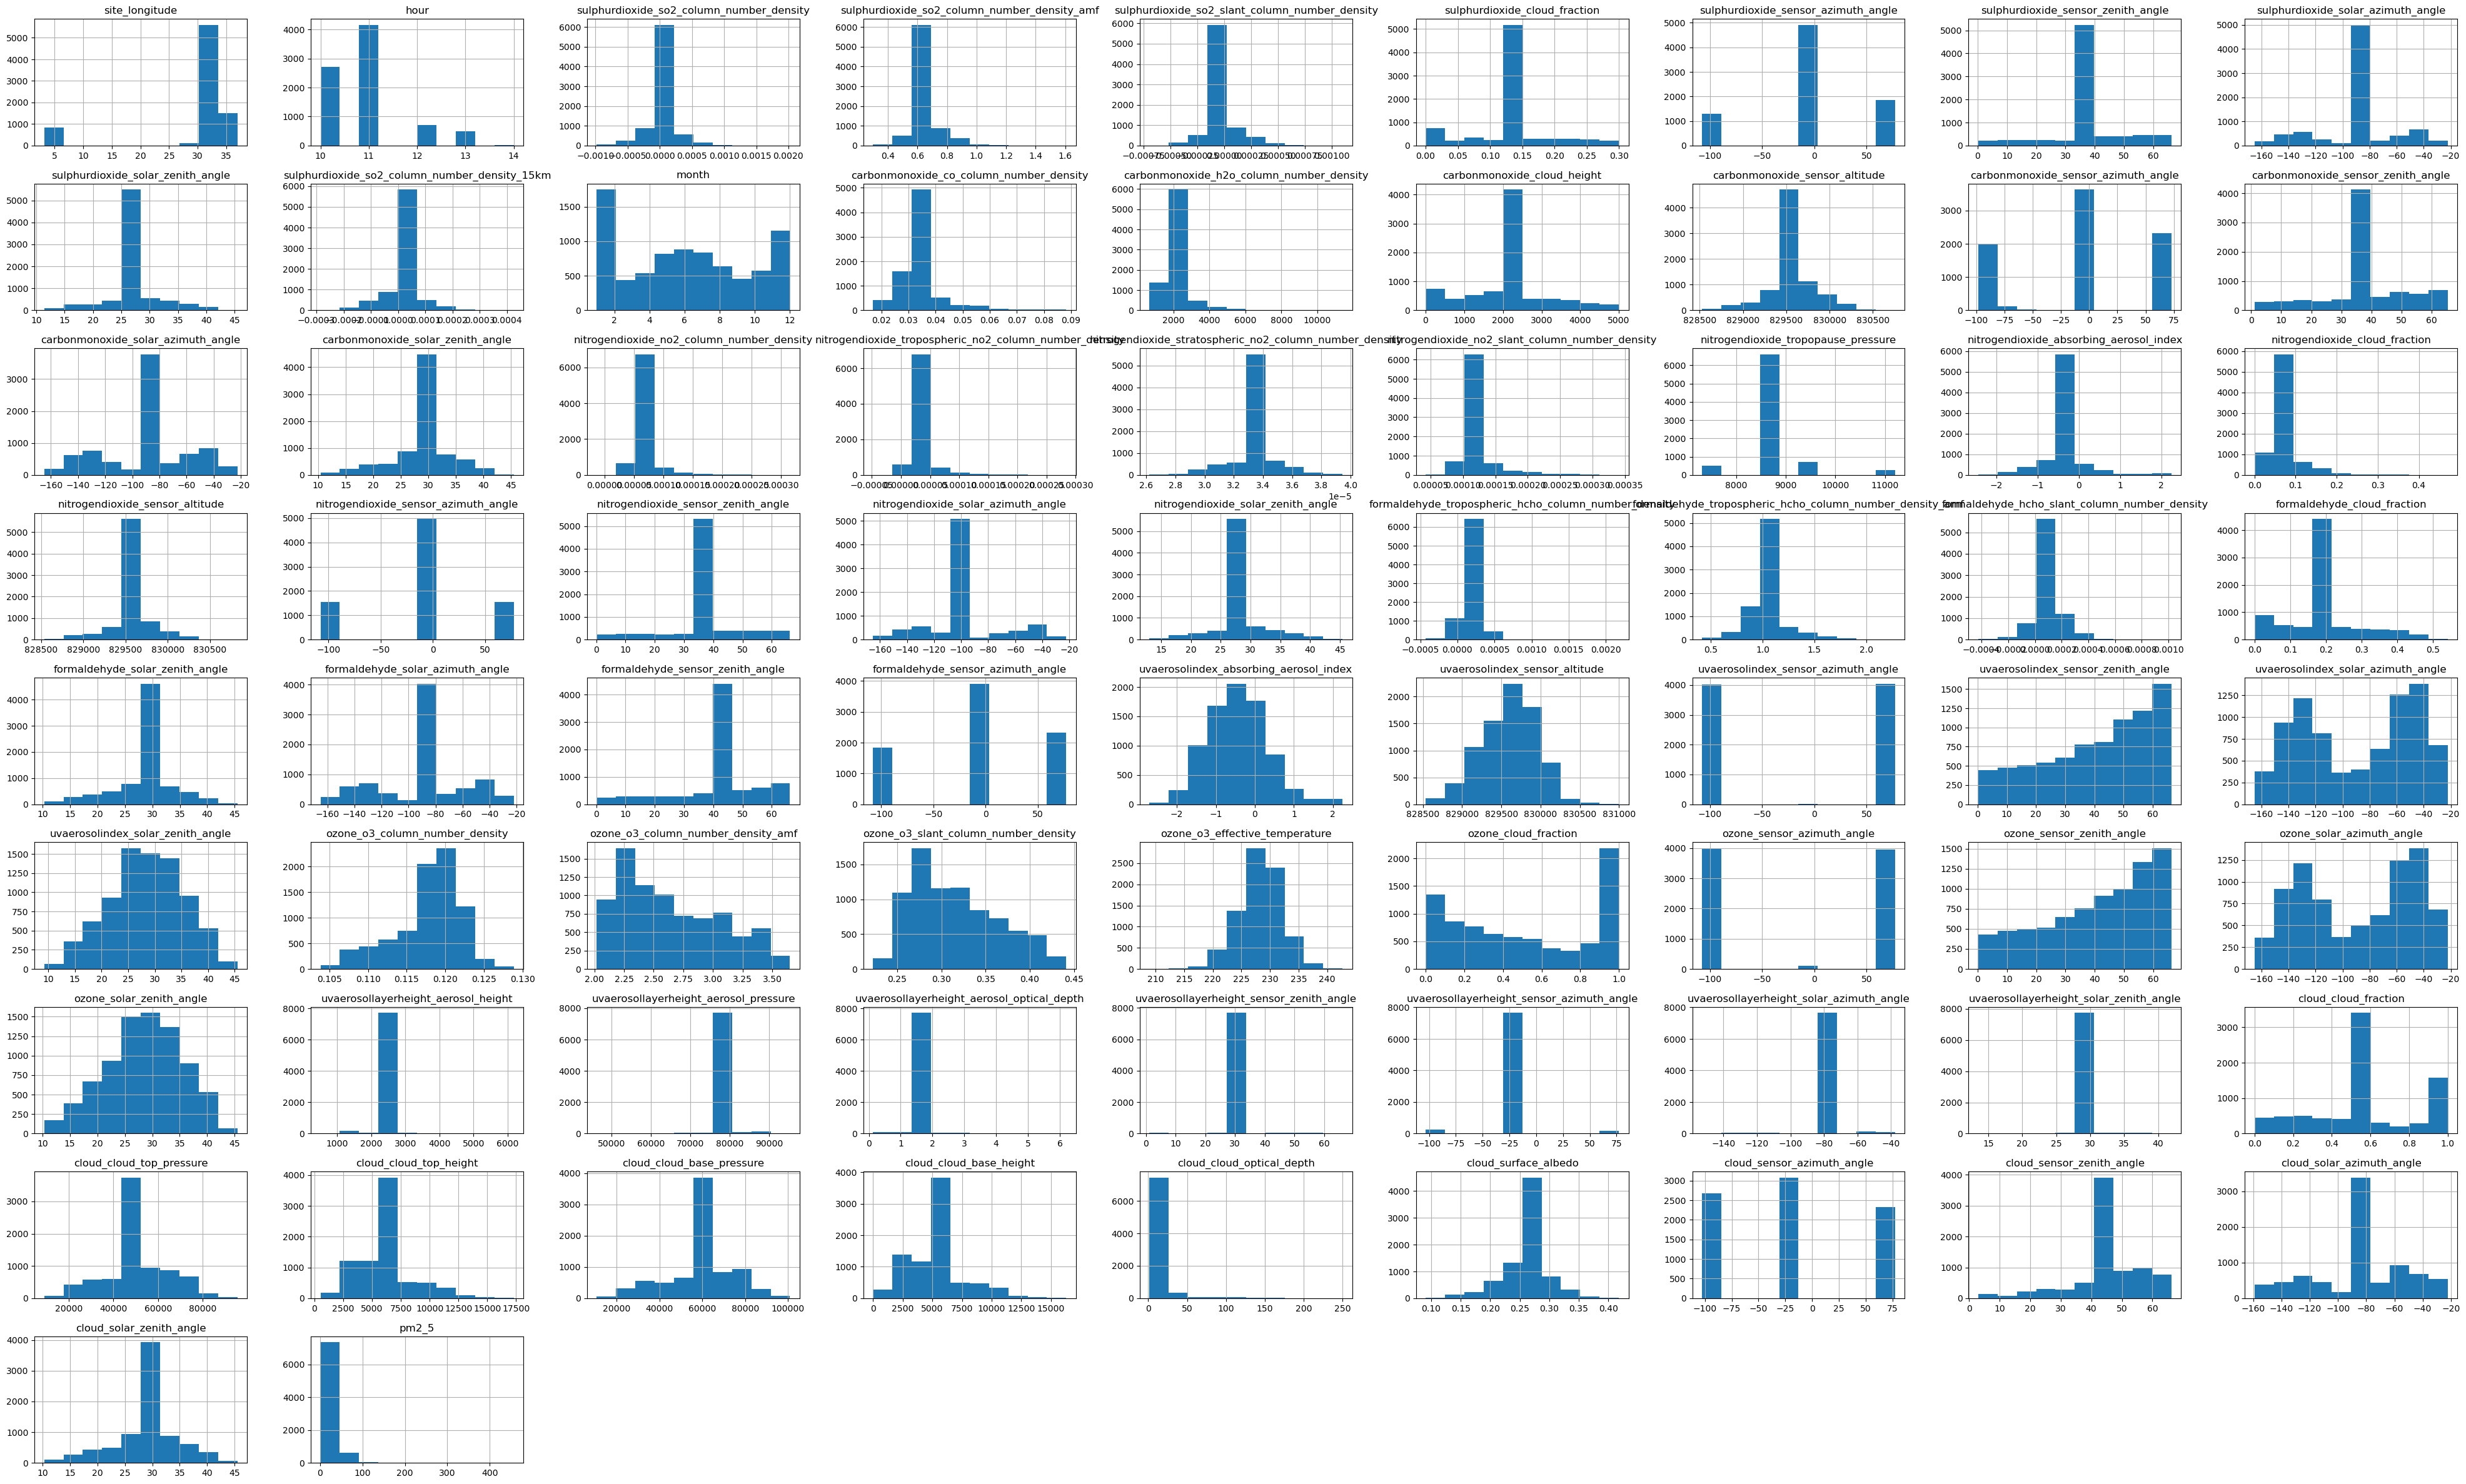

In [25]:
train_all[cont].hist(figsize=(50,30))
plt.show()

In [26]:
#sns.pairplot(train_all)

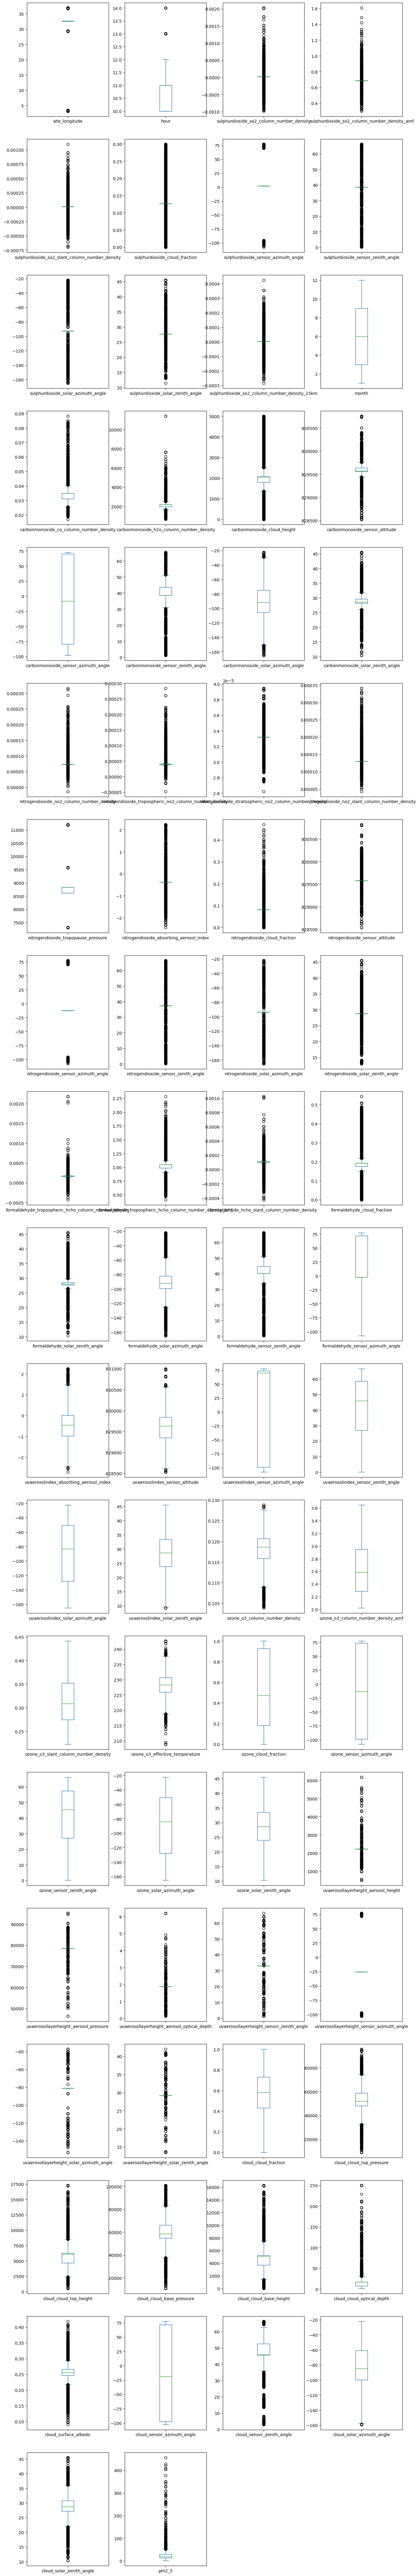

In [27]:
train_all[cont].plot(kind='box', 
                   subplots=True, 
                   layout=(43, 4), 
                   sharex=False, 
                   figsize=(16, 250))

plt.show()